# 1.차원축소 (PCA, T-SNE)

In [ ]:
from sklearn.datasets import load_iris, load_wine
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
irisDF =  pd.DataFrame(iris['data'], columns = iris['feature_names'])
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

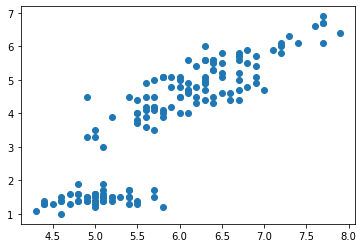

In [ ]:
plt.scatter(irisDF['sepal length (cm)'],irisDF['petal length (cm)'])
plt.plot

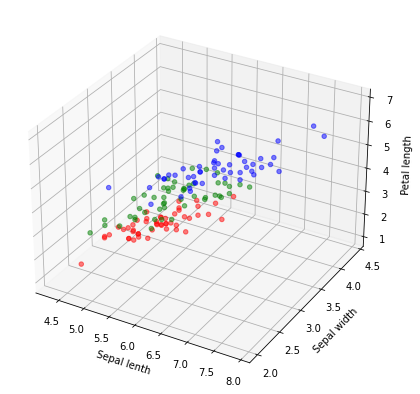

In [ ]:
color=[]
for n in iris.target:
    if n==0:
        color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

fig = plt.figure(figsize=(12,7))
ax = fig.gca(projection='3d' )
ax.scatter(irisDF['sepal length (cm)'],irisDF['sepal width (cm)'],
           irisDF['petal length (cm)'],  alpha=0.5,c=color)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [ ]:
model = PCA(n_components=2) # 2차원으로 차원을 축소
pcaf = model.fit_transform(irisDF)

In [ ]:
model.transform( [[3,2,1,2]])

array([[-3.01400139, -2.2211981 ]])

In [ ]:
pcaf.shape

(150, 2)

In [ ]:
pcaf

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

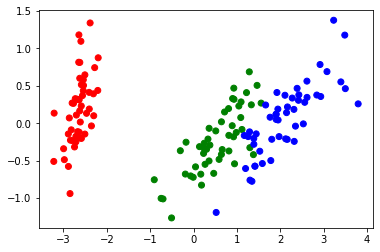

In [ ]:
plt.scatter(pcaf[:,0], pcaf[:,1], c = color)

## 1-1.연습문제
wine 데이터 셋을 2차원으로 차원축소 후 분류하시오

In [ ]:
wine = load_wine()
wineDF = pd.DataFrame(wine['data'], columns = wine['feature_names'])
wineDF

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
model = PCA(n_components=2)
pcaf = model.fit_transform(wineDF)

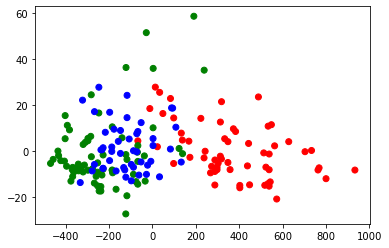

In [ ]:
color=[]
for n in wine.target:
    if n==0:
   
color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

plt.scatter(pcaf[:,0], pcaf[:,1], c = color)

In [ ]:
pcaf.shape

(178, 2)

In [ ]:
model.inverse_transform([[400,16]])
# 각 컬럼의 값들임

array([[1.36835784e+01, 2.09842180e+00, 2.51797823e+00, 1.80496299e+01,
        1.22878283e+02, 2.70509163e+00, 2.65535537e+00, 2.90947605e-01,
        1.91121240e+00, 6.23055281e+00, 1.01379868e+00, 2.83773222e+00,
        1.14653805e+03]])